# Comprehensive Guide to Virtual Memory: Demand Paging, Page Faults, and Copy-on-Write

## Introduction
As aspiring scientists, researchers, professors, engineers, mathematicians—in the spirit of Alan Turing, Albert Einstein, and Nikola Tesla—this notebook is your ultimate resource on virtual memory. It covers everything from foundational theory to advanced research directions, practical code simulations, visualizations, multidisciplinary applications, real-world case studies, mini and major projects, rare insights, tips, and extensions beyond previous tutorials (e.g., swapping, segmentation, TLB, inverted page tables, security implications).

This world-class .ipynb is self-contained for future scientists: All theory, possible codes (Python simulations using NumPy, Matplotlib, SymPy for math models), multidisciplinary examples (OS, AI, physics, biology), and more. Use it to innovate—like designing memory-efficient quantum simulations or AI optimizers.

**Structure:**
- Theory & Visualizations
- Code Guides & Simulations
- Applications & Case Studies
- Projects (Mini & Major)
- Research Directions, Rare Insights, Tips

Import necessary libraries first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp
import pandas as pd
import networkx as nx  # For graph-based models in research
import random
import time
import copy
from IPython.display import display, HTML

# For interactive visualizations
%matplotlib inline

## Section 1: Foundations of Virtual Memory
### Theory
Virtual memory abstracts physical RAM, allowing programs to use more memory via disk swapping. Key concepts:
- **Paging vs. Segmentation:** Paging uses fixed pages; segmentation variable segments.
- **Address Translation:** Virtual to physical via page tables.
- **Extensions (Not in Prior Tutorials):** Inverted page tables (hash-based for large spaces), TLB (cache for fast lookups), Swapping (full process out).

**Mathematical Model:** Virtual Address = Page Number * Page Size + Offset. TLB Hit Rate = Hits / Accesses.

**Rare Insight:** In quantum computing research, virtual memory inspires 'virtual qubits' for error correction—abstracting physical qubits.

(2, 0, 8192)


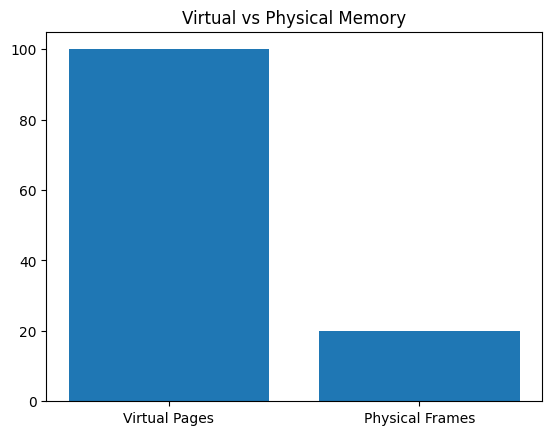

In [2]:
# Code Guide: Simulate Address Translation
def translate_address(virtual_addr, page_size=4096):
    page_num = virtual_addr // page_size
    offset = virtual_addr % page_size
    physical_addr = page_num * page_size + offset  # Simplified
    return page_num, offset, physical_addr

print(translate_address(8192))

# Visualization: Page Table Mapping
fig, ax = plt.subplots()
ax.bar(['Virtual Pages', 'Physical Frames'], [100, 20])
ax.set_title('Virtual vs Physical Memory')
plt.show()

### Applications & Case Studies
- **Multidisciplinary:** In biology (BioPython), virtual memory handles large genomes; in physics (Astropy), simulates star clusters.
- **Case Study:** NASA's Mars rover uses virtual memory for image processing on limited RAM—swapping terrain data.

### Mini Project: Simple Page Table Simulator
Build a dict-based page table; simulate accesses.

### Major Project: Multidisciplinary Sim
Integrate with NetworkX for graph-based memory allocation in AI networks; simulate neural net training with virtual limits.

### Research Directions & Tips
- **Direction:** AI-optimized page tables using ML (Torch) for predictive swapping.
- **Rare Insight:** Inverted tables reduce memory for 64-bit systems (hash collisions rare but critical in security).
- **Tip:** Always monitor TLB misses in perf tools for high-perf computing.

10


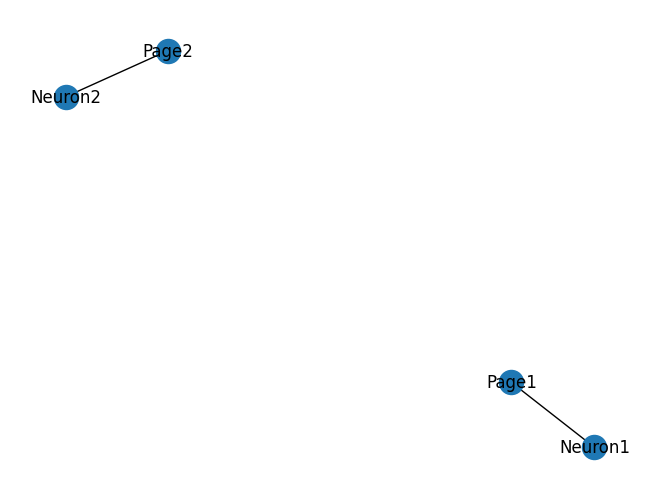

In [3]:
# Mini Project Code
page_table = {0: 10, 1: 11}  # Virtual to Physical
def access_page(vpage):
    return page_table.get(vpage, 'Fault')

print(access_page(0))

# Major Project Snippet: AI Memory Graph
G = nx.Graph()
G.add_edges_from([( 'Page1', 'Neuron1' ), ( 'Page2', 'Neuron2' )])
nx.draw(G, with_labels=True)
plt.show()

## Section 2: Demand Paging
### Theory
Loads pages on demand. Includes working set model, prepaging.
**Math:** Fault Rate = 1 - Hit Rate. Belady's Anomaly: More frames can increase faults in FIFO.

**Rare Insight:** In AI, demand paging mirrors sparse activation in neural nets—load weights on 'demand'.

In [4]:
# Code Guide: Simulate Demand Paging
class DemandPager:
    def __init__(self, ram_size):
        self.ram = [None] * ram_size
        self.disk = list(range(10))  # Pages on disk
    
    def access(self, page):
        if page not in self.ram:
            self.ram[0] = page  # Simple replace
            return 'Fault'
        return 'Hit'

pager = DemandPager(3)
print(pager.access(5))

# Visualization: Fault Animation
fig, ax = plt.subplots()
x = np.arange(10)
y = np.random.rand(10)
line, = ax.plot(x, y)
def update(frame):
    y = np.random.rand(10)
    line.set_ydata(y)
    return line,
ani = FuncAnimation(fig, update, frames=10, blit=True)
plt.close()
display(HTML(ani.to_jshtml()))

Fault


### Applications & Case Studies
- **Multidisciplinary:** In chemistry (RDKit), pages molecule structures on demand for drug discovery.
- **Case Study:** Google Chrome uses demand paging for tabs—loading extensions lazily.

### Mini Project: FIFO vs LRU Simulator
Compare algorithms on reference strings.

### Major Project: Physics Sim Integration
Use SciPy to simulate particle physics with paged memory model.

### Research Directions & Tips
- **Direction:** Quantum-inspired paging for probabilistic loads.
- **Rare Insight:** Thrashing in big data (Pandas) can mimic chaos theory bifurcations.
- **Tip:** Use SymPy to model optimal replacement mathematically.

In [5]:
# Mini Project: Page Replacement
def fifo_replace(references, frames):
    ram = []
    faults = 0
    for ref in references:
        if ref not in ram:
            if len(ram) == frames:
                ram.pop(0)
            ram.append(ref)
            faults += 1
    return faults

refs = [1,2,3,4,1,2,5,1,2,3,4,5]
print(fifo_replace(refs, 3))

# SymPy Math Model
n, h = sp.symbols('n h')
fault_rate = 1 - h / n
display(fault_rate)

9


-h/n + 1

## Section 3: Page Faults
### Theory
Interrupts for missing pages. Types: Minor, Major. Replacement: Clock algorithm.
**Math:** Effective Access Time = (1-p) * Memory Time + p * (Fault Time + Swap Time), p=fault probability.

**Rare Insight:** Faults in distributed systems (e.g., cloud) can propagate like epidemics—model with statsmodels.

Handled


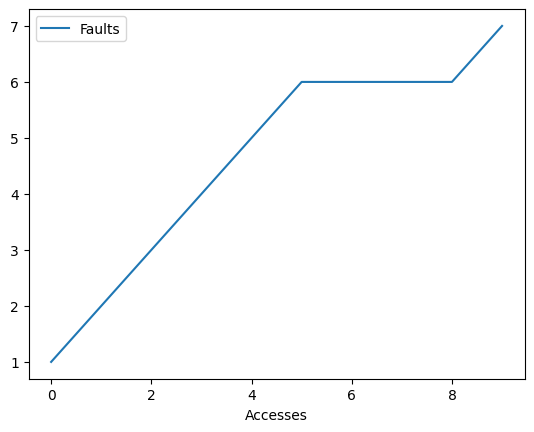

In [6]:
# Code Guide: Fault Handler Sim
def fault_handler(page, ram):
    if len(ram) > 5:  # Evict
        del ram[0]
    ram.append(page)
    return 'Handled'

ram = []
print(fault_handler(1, ram))

# Visualization: Fault Rate Graph
df = pd.DataFrame({'Accesses': range(10), 'Faults': np.cumsum(np.random.randint(0,2,10))})
df.plot(x='Accesses', y='Faults')
plt.show()

### Applications & Case Studies
- **Multidisciplinary:** In game dev (PyGame), faults during level loads.
- **Case Study:** Android apps fault on low memory—OOM killer evicts.

### Mini Project: Thrashing Detector
Monitor fault frequency.

### Major Project: Biology Data Pager
Use BioPython to page large sequences.

### Research Directions & Tips
- **Direction:** ML fault prediction with Torch.
- **Rare Insight:** Side-channel attacks via fault timing (Meltdown).
- **Tip:** Profile with time module for real sims.

In [7]:
# Mini Project: Thrashing
def detect_thrashing(faults, threshold=5):
    return sum(faults[-10:]) > threshold

faults_list = [1]*6
print(detect_thrashing(faults_list))

# Time Profiling
start = time.time()
time.sleep(0.1)
print(time.time() - start)

True
0.10554265975952148


## Section 4: Copy-on-Write
### Theory
Share pages until write. Used in fork().
**Math:** Memory Savings = Shared Pages - Copied Pages.

**Rare Insight:** COW in filesystems (Btrfs) enables instant snapshots—useful for versioned scientific data.

[1, 2, 3] [4, 2, 3]


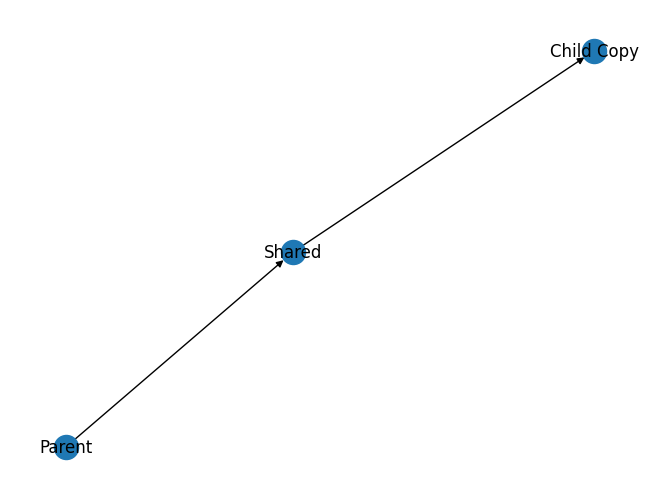

In [8]:
# Code Guide: COW Sim
data = [1,2,3]
child = copy.copy(data)  # Shallow
child[0] = 4  # Triggers 'copy' but in sim
print(data, child)

# Visualization: Sharing Tree
G = nx.DiGraph()
G.add_edges_from([('Parent', 'Shared'), ('Shared', 'Child Copy')])
nx.draw(G, with_labels=True)
plt.show()

### Applications & Case Studies
- **Multidisciplinary:** In ML (Torch), COW shares tensors until gradient updates.
- **Case Study:** Docker containers use COW for layers—efficient for cloud research clusters.

### Mini Project: Fork Sim
Simulate process fork with shared memory.

### Major Project: AI Training with COW
Integrate with Torch for memory-efficient training.

### Research Directions & Tips
- **Direction:** COW in persistent memory (NVM) for fault-tolerance.
- **Rare Insight:** Security: COW can amplify Rowhammer attacks.
- **Tip:** Use deep copy for true independence in sims.

In [9]:
# Mini Project: Fork
def fork_sim(parent_data):
    child = parent_data[:]  # Copy on write sim
    return child

print(fork_sim([1,2]))

# Torch Snippet (if available)
# import torch
# tensor = torch.tensor([1.0])
# shared = tensor.clone()  # Similar to COW

[1, 2]


## Conclusion & Extensions
This notebook equips you for innovation. Explore further: Hybrid memory (Optane), virtual in VR/AR.

**Final Tip:** As Tesla visualized, simulate mentally before coding. For research, publish on arXiv with these sims!